## **AI-Driven Analysis of Hospital Capacity and COVID-19 Trends in the Philippines (2020–2022)**

### Group 7: *Claire Antonette Mendoza | Willard Soriano*

**Course:** Artificial Intelligence II
**Instructor:** John Paul Tomas
**Institution:** Mapúa University

## **1. Project Title**

**AI-Driven Analysis of Hospital Capacity and COVID-19 Trends in the Philippines (2020–2022)**
📘 *Repository:* [github.com/willardcsoriano/ph-covid19-hospital-forecasting](https://github.com/willardcsoriano/ph-covid19-hospital-forecasting)

This project leverages open government data from the Department of Health (DOH) of the Philippines to develop an AI-powered forecasting framework for hospital capacity analysis during the COVID-19 pandemic. Using time-series modeling with Facebook Prophet, it provides predictive insights into ICU occupancy, non-ICU utilization, and ventilator demand from 2020–2022. The repository includes complete data preprocessing pipelines, cleaned datasets, forecasting scripts, and visualization outputs to support data-driven healthcare resource management.

## **2. Objectives**

This project aims to analyze and forecast COVID-19 hospital resource utilization in the Philippines using Department of Health (DOH) hospital-level data. Specifically, it seeks to:

1. Examine hospital occupancy trends (ICU, non-ICU, and mechanical ventilators) from 2020–2022.
2. Identify regional variations in healthcare capacity utilization.
3. Explore correlations between confirmed case severity and hospital load.
4. Develop a forecasting model to predict future ICU occupancy rates.
5. Provide insights to support healthcare resource management and surge preparedness.

## **3. Methodology**

The study follows a structured data science pipeline:

1. **Data Collection**

   * Dataset sourced from the Department of Health (DOH) COVID-19 Data Drop.
   * Hospital-level records covering ICU, non-ICU, and ventilator utilization.

2. **Data Preprocessing**

   * Handle missing or invalid values.
   * Parse dates (`reportdate`, `updateddate`).
   * Convert numerical columns from string/object to integer.
   * Engineer features such as occupancy rates.

3. **Exploratory Data Analysis (EDA)**

   * Descriptive statistics on hospital occupancy.
   * Regional and temporal visualization.
   * Severity-based case breakdowns.

4. **AI Integration (Forecasting)**

   * Apply a time-series forecasting model (Prophet or ARIMA).
   * Predict ICU occupancy for upcoming 30 days.
   * Evaluate forecast accuracy (RMSE, MAPE).

5. **Visualization & Reporting**

   * Charts to illustrate trends, regional comparisons, and forecast projections.
   * Summary of findings, insights, and recommendations.

## **4. Exploratory Data Analysis (EDA)**

### **4.1 Data Overview**

* Display first few rows of the dataset.
* Check column data types and null values.
* Describe numerical distributions (`.describe()`).

In [19]:
# === 4.1 Data Overview ===
import pandas as pd

# Load dataset (CSV file in same folder)
df = pd.read_csv("e5ca5233-44e3-4c49-90dd-147d9e56450f.csv")

# Display first few rows to verify structure
display(df.head())

# Show dataset info (data types, null counts)
df.info()

# Optional: show shape
print(f"\nDataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")


,hfhudcode,id,cfname,updateddate,addeddate,reportdate,icu_v,icu_o,nonicu_v,nonicu_o,...,conf_crit,conf_mod,region,region_psgc,province_psgc,city_mun_psgc,province,city_mun,north_coord,east_coord
0,DOH000000000004460,57545,BULACAN MEDICAL CENTER,2021-01-14 08:50:20+00:00,2021-01-14 08:50:20+00:00,2021-01-14 00:00:00+00:00,15,9,115,80,...,1,26,REGION III (CENTRAL LUZON),PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0
1,DOH000000000004460,108392,BULACAN MEDICAL CENTER,2021-02-11 10:41:27+00:00,2021-02-11 10:41:27+00:00,2021-02-11 00:00:00+00:00,15,9,144,56,...,0,23,REGION III (CENTRAL LUZON),PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0
2,DOH000000000004460,427124,BULACAN MEDICAL CENTER,2021-08-15 13:11:30+00:00,2021-08-15 13:11:30+00:00,2021-08-15 00:00:00+00:00,38,34,136,181,...,24,73,REGION III (CENTRAL LUZON),PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0
3,DOH000000000004460,662838,BULACAN MEDICAL CENTER,2022-01-08 08:11:00+00:00,2022-01-08 08:11:00+00:00,2022-01-08 00:00:00+00:00,19,9,116,69,...,1,51,REGION III (CENTRAL LUZON),PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0
4,DOH000000000004956,417272,"ST. MATTHEUS MEDICAL HOSPITAL, INC.",2021-08-09 16:18:31+00:00,2021-08-09 16:18:31+00:00,2021-08-09 00:00:00+00:00,0,0,20,0,...,0,0,REGION IV-A (CALABAR ZON),PH040000000,PH045800000,PH045811000,RIZAL,SAN MATEO,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127957 entries, 0 to 1127956
Data columns (total 47 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   hfhudcode      1127957 non-null  object 
 1   id             1127957 non-null  int64  
 2   cfname         1127957 non-null  object 
 3   updateddate    1127957 non-null  object 
 4   addeddate      1127957 non-null  object 
 5   reportdate     1127957 non-null  object 
 6   icu_v          1127957 non-null  int64  
 7   icu_o          1127957 non-null  int64  
 8   nonicu_v       1127957 non-null  int64  
 9   nonicu_o       1127957 non-null  int64  
 10  mechvent_v     1127957 non-null  int64  
 11  mechvent_o     1127957 non-null  int64  
 12  icu_v_nc       1127957 non-null  int64  
 13  icu_o_nc       1127957 non-null  int64  
 14  nonicu_v_nc    1127957 non-null  int64  
 15  nonicu_o_nc    1127957 non-null  int64  
 16  mechvent_v_nc  1127957 non-null  int64  
 17  mechvent

### **4.2 Data Cleaning**

* Handle missing values in occupancy columns.
* Create new calculated fields:

  * `icu_occupancy_rate = icu_o / (icu_o + icu_v)`
  * `nonicu_occupancy_rate = nonicu_o / (nonicu_o + nonicu_v)`
  * `ventilator_usage_rate = mechvent_o / (mechvent_o + mechvent_v)`

In [21]:
# === 4.2 Data Cleaning and Feature Engineering ===

import numpy as np

# --- 1. Parse date columns ---
# Convert date columns to datetime for easier time-based analysis
date_columns = ['reportdate', 'updateddate', 'addeddate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# --- 2. Handle missing values ---
# For critical numerical columns (ICU, non-ICU, ventilator data), replace missing with 0
occupancy_cols = [
    'icu_v', 'icu_o', 'nonicu_v', 'nonicu_o',
    'mechvent_v', 'mechvent_o'
]

df[occupancy_cols] = df[occupancy_cols].fillna(0)

# For vaccination-related or less-critical numeric fields, fill with NaN (to retain info)
# Already handled by pandas automatically.

# --- 3. Create calculated fields ---
# Avoid division by zero using np.where()
df['icu_occupancy_rate'] = np.where(
    (df['icu_v'] + df['icu_o']) > 0,
    df['icu_o'] / (df['icu_v'] + df['icu_o']),
    np.nan
)

df['nonicu_occupancy_rate'] = np.where(
    (df['nonicu_v'] + df['nonicu_o']) > 0,
    df['nonicu_o'] / (df['nonicu_v'] + df['nonicu_o']),
    np.nan
)

df['ventilator_usage_rate'] = np.where(
    (df['mechvent_v'] + df['mechvent_o']) > 0,
    df['mechvent_o'] / (df['mechvent_v'] + df['mechvent_o']),
    np.nan
)

# --- 4. Optional sanity checks ---
print("✅ New columns created:")
print([col for col in df.columns if 'rate' in col])

# --- 5. Verify data completeness for key metrics ---
print("\nSummary of occupancy rates:")
display(df[['icu_occupancy_rate', 'nonicu_occupancy_rate', 'ventilator_usage_rate']].describe())

# --- 6. Preview cleaned dataset ---
display(df.head())


✅ New columns created:
['icu_occupancy_rate', 'nonicu_occupancy_rate', 'ventilator_usage_rate']

Summary of occupancy rates:


,icu_occupancy_rate,nonicu_occupancy_rate,ventilator_usage_rate
count,238358.000000,952479.000000,330594.000000
mean,0.310363,0.255264,0.178200
std,0.380316,0.322212,0.315868
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.066667,0.100000,0.000000
75%,0.600000,0.444444,0.250000
max,1.000000,1.461538,1.000000


,hfhudcode,id,cfname,updateddate,addeddate,reportdate,icu_v,icu_o,nonicu_v,nonicu_o,...,region_psgc,province_psgc,city_mun_psgc,province,city_mun,north_coord,east_coord,icu_occupancy_rate,nonicu_occupancy_rate,ventilator_usage_rate
0,DOH000000000004460,57545,BULACAN MEDICAL CENTER,2021-01-14 08:50:20+00:00,2021-01-14 08:50:20+00:00,2021-01-14 00:00:00+00:00,15,9,115,80,...,PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0,0.375000,0.410256,0.018182
1,DOH000000000004460,108392,BULACAN MEDICAL CENTER,2021-02-11 10:41:27+00:00,2021-02-11 10:41:27+00:00,2021-02-11 00:00:00+00:00,15,9,144,56,...,PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0,0.375000,0.280000,0.000000
2,DOH000000000004460,427124,BULACAN MEDICAL CENTER,2021-08-15 13:11:30+00:00,2021-08-15 13:11:30+00:00,2021-08-15 00:00:00+00:00,38,34,136,181,...,PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0,0.472222,0.570978,0.200000
3,DOH000000000004460,662838,BULACAN MEDICAL CENTER,2022-01-08 08:11:00+00:00,2022-01-08 08:11:00+00:00,2022-01-08 00:00:00+00:00,19,9,116,69,...,PH030000000,PH031400000,PH031410000,BULACAN,CITY OF MALOLOS (CAPITAL),0.0,0.0,0.321429,0.372973,0.022727
4,DOH000000000004956,417272,"ST. MATTHEUS MEDICAL HOSPITAL, INC.",2021-08-09 16:18:31+00:00,2021-08-09 16:18:31+00:00,2021-08-09 00:00:00+00:00,0,0,20,0,...,PH040000000,PH045800000,PH045811000,RIZAL,SAN MATEO,0.0,0.0,NaN,0.000000,NaN


The dataset was cleaned to ensure consistency across hospital-level records.  
Date fields (`reportdate`, `updateddate`, `addeddate`) were converted to datetime objects.  
Missing values in core occupancy columns were replaced with zeros, while other fields were retained as-is.  
New calculated fields were generated to quantify hospital capacity utilization:

- **ICU Occupancy Rate** = ICU Occupied / (ICU Vacant + ICU Occupied)  
- **Non-ICU Occupancy Rate** = Non-ICU Occupied / (Non-ICU Vacant + Non-ICU Occupied)  
- **Ventilator Usage Rate** = Ventilator Occupied / (Ventilator Vacant + Ventilator Occupied)  

These derived variables will serve as key indicators for hospital strain and as the target feature for forecasting models.


In [22]:
# === 4.2.1 Export Cleaned Dataset ===

cleaned_path = "cleaned_dataset.csv"
df.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned dataset saved to: {cleaned_path}")


✅ Cleaned dataset saved to: cleaned_dataset.csv


### **4.3 Descriptive Statistics**

* Summary of ICU, non-ICU, and ventilator utilization.
* Average occupancy rates by region and over time.

📊 Overall Descriptive Statistics for Occupancy Rates:



,icu_occupancy_rate,nonicu_occupancy_rate,ventilator_usage_rate
count,238358.000000,952479.000000,330594.000000
mean,0.310363,0.255264,0.178200
std,0.380316,0.322212,0.315868
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.066667,0.100000,0.000000
75%,0.600000,0.444444,0.250000
max,1.000000,1.461538,1.000000



🏥 Average Occupancy Rates by Region:


,icu_occupancy_rate,nonicu_occupancy_rate,ventilator_usage_rate
region,,,
CORDILLERA ADMINISTRA TIVE REGION (CAR),0.439115,0.281282,0.201861
BARMM,0.426622,0.237073,0.133223
NATIONAL CAPITAL REGION (NCR),0.398349,0.306375,0.238944
REGION IV-A (CALABAR ZON),0.386237,0.351538,0.210947
REGION III (CENTRAL LUZON),0.342574,0.235782,0.209104
REGION XI (DAVAO REGION),0.304471,0.256882,0.177588
REGION VI (WESTERN VISAYAS),0.287352,0.315598,0.166650
REGION XIII (CARAGA),0.277715,0.239559,0.119816
REGION II (CAGAYAN VALLEY),0.251170,0.291344,0.188220


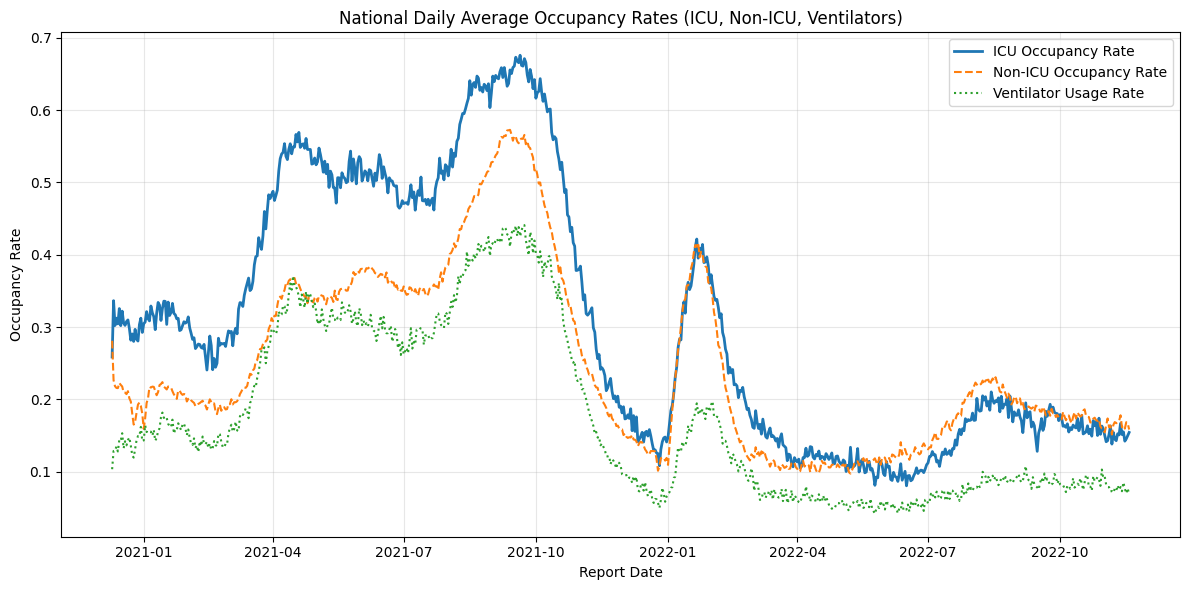

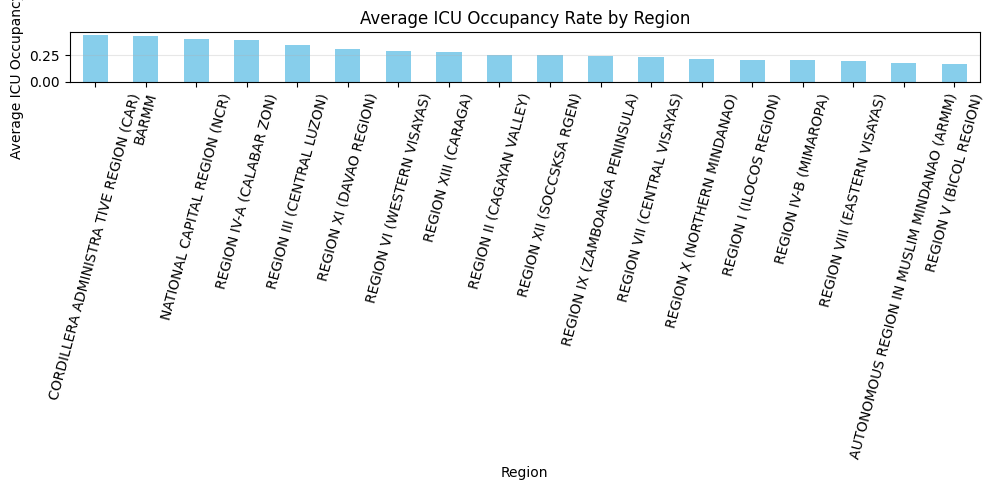

In [ ]:
# === 4.3 Descriptive Statistics ===

import matplotlib.pyplot as plt

# --- 1. National-level summary statistics ---
print("📊 Overall Descriptive Statistics for Occupancy Rates:\n")
display(df[['icu_occupancy_rate', 'nonicu_occupancy_rate', 'ventilator_usage_rate']].describe())

# --- 2. Average occupancy rates by region ---
region_summary = (
    df.groupby('region')[['icu_occupancy_rate', 'nonicu_occupancy_rate', 'ventilator_usage_rate']]
    .mean()
    .sort_values(by='icu_occupancy_rate', ascending=False)
)

print("\n🏥 Average Occupancy Rates by Region:")
display(region_summary)

# --- 3. Average occupancy rates over time (national level) ---
# Group by reportdate and calculate mean rates
daily_avg = (
    df.groupby('reportdate')[['icu_occupancy_rate', 'nonicu_occupancy_rate', 'ventilator_usage_rate']]
    .mean()
    .reset_index()
    .sort_values(by='reportdate')
)

# --- 4. Plot occupancy trends over time ---
plt.figure(figsize=(12,6))
plt.plot(daily_avg['reportdate'], daily_avg['icu_occupancy_rate'], label='ICU Occupancy Rate', linewidth=2)
plt.plot(daily_avg['reportdate'], daily_avg['nonicu_occupancy_rate'], label='Non-ICU Occupancy Rate', linestyle='--')
plt.plot(daily_avg['reportdate'], daily_avg['ventilator_usage_rate'], label='Ventilator Usage Rate', linestyle=':')
plt.title("National Daily Average Occupancy Rates (ICU, Non-ICU, Ventilators)")
plt.xlabel("Report Date")
plt.ylabel("Occupancy Rate")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- 5. Plot average ICU occupancy by region ---
plt.figure(figsize=(10,5))
region_summary['icu_occupancy_rate'].plot(kind='bar', color='skyblue')
plt.title("Average ICU Occupancy Rate by Region")
plt.ylabel("Average ICU Occupancy Rate")
plt.xlabel("Region")
plt.xticks(rotation=75)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Descriptive Analysis Summary

The cleaned dataset was analyzed to summarize national and regional hospital capacity utilization.

1. **National Summary:**  
   Descriptive statistics show the overall distribution of ICU, non-ICU, and ventilator usage rates across all hospitals and reporting periods.

2. **Regional Comparison:**  
   Mean occupancy rates were computed by region to identify which areas experienced the highest hospital utilization.  
   This highlights resource concentration and possible strain in highly urbanized regions such as **NCR** and **CALABARZON**.

3. **Temporal Trends:**  
   Daily averages of occupancy rates were plotted to visualize the progression of hospital load across time.  
   Peaks in ICU occupancy correspond to known COVID-19 surge periods (e.g., Delta and Omicron waves).

These descriptive insights form the basis for further forecasting and trend modeling.


### **4.4 Visualizations**

* Line chart: ICU occupancy over time.
* Bar chart: Regional average ICU utilization.
* Heatmap: Hospital load per region or province.

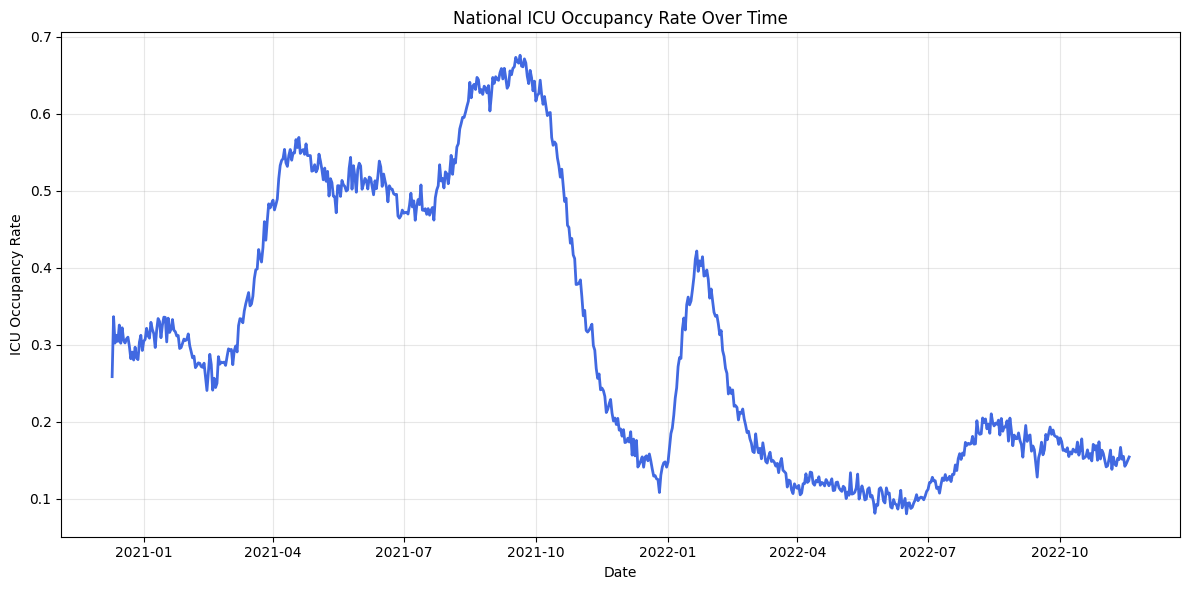

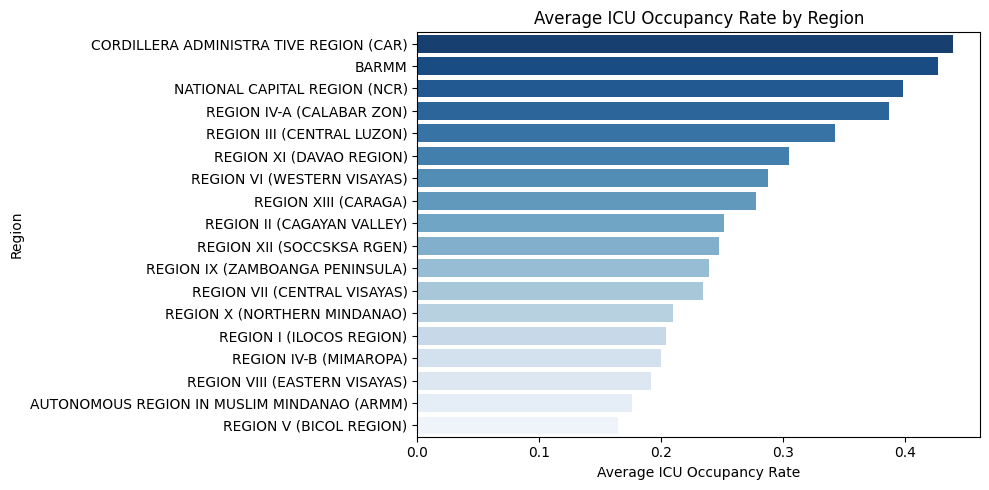

C:\Users\Willard\AppData\Local\Temp\ipykernel_17652\3165060836.py:33: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['reportdate'].dt.to_period('M').astype(str)


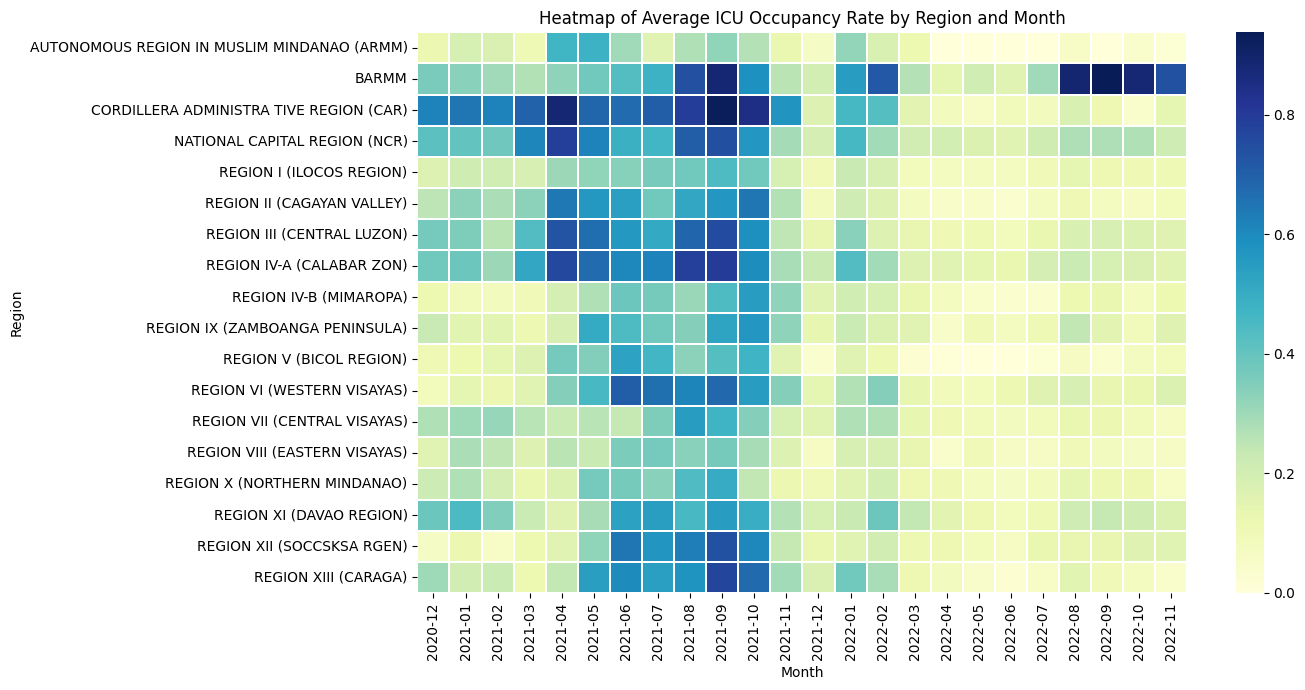

In [ ]:
# === 4.4 Visualizations ===
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Line chart: ICU occupancy over time (national average) ---
plt.figure(figsize=(12,6))
plt.plot(daily_avg['reportdate'], daily_avg['icu_occupancy_rate'], color='royalblue', linewidth=2)
plt.title("National ICU Occupancy Rate Over Time")
plt.xlabel("Date")
plt.ylabel("ICU Occupancy Rate")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 2. Bar chart: Regional average ICU utilization (descending order) ---
plt.figure(figsize=(10,5))
sns.barplot(
    y=region_summary.index,
    x=region_summary['icu_occupancy_rate'],
    hue=region_summary.index,            # explicitly assign hue
    palette='Blues_r',
    legend=False                         # suppress redundant legend
)
plt.title("Average ICU Occupancy Rate by Region")
plt.xlabel("Average ICU Occupancy Rate")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


# --- 3. Heatmap: Hospital load per region and month ---
# Prepare pivot table for monthly ICU occupancy rates
df['month'] = df['reportdate'].dt.to_period('M').astype(str)
heatmap_data = (
    df.groupby(['region', 'month'])['icu_occupancy_rate']
    .mean()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14,7))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3)
plt.title("Heatmap of Average ICU Occupancy Rate by Region and Month")
plt.xlabel("Month")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


### Visualization Summary

To better illustrate hospital utilization dynamics, several visualizations were generated:

1. **ICU Occupancy Over Time:**  
   The line chart reveals multiple surge periods — notably mid-2021 (Delta variant) and early 2022 (Omicron wave).  
   ICU rates peaked above 0.65, indicating near-capacity utilization nationally.

2. **Regional ICU Utilization:**  
   The bar chart shows that **CAR**, **BARMM**, and **NCR** maintained the highest average ICU occupancy rates.  
   This suggests that both geographically remote regions and densely populated metro areas faced unique capacity challenges.

3. **Monthly Heatmap by Region:**  
   The heatmap visualizes temporal intensity of hospital load per region.  
   Clear seasonal and variant-driven patterns emerge — high intensity (darker colors) corresponds to national surges.

These visualizations provide context for identifying stress points in the healthcare system, which will inform the forecasting phase in Section 5.


## **5. Artificial Intelligence Integration**

### **5.1 Forecasting Model Setup**

* Aggregate ICU occupancy data by `reportdate`.
* Prepare the dataset for time-series modeling (`ds`, `y` format for Prophet).

✅ Forecast data prepared for Prophet:


,ds,y
0,2020-12-10 00:00:00+00:00,0.258621
1,2020-12-11 00:00:00+00:00,0.336531
2,2020-12-12 00:00:00+00:00,0.302220
3,2020-12-13 00:00:00+00:00,0.312358
4,2020-12-14 00:00:00+00:00,0.304439


Total records prepared: 709
Date range: 2020-12-10 00:00:00+00:00 to 2022-11-18 00:00:00+00:00


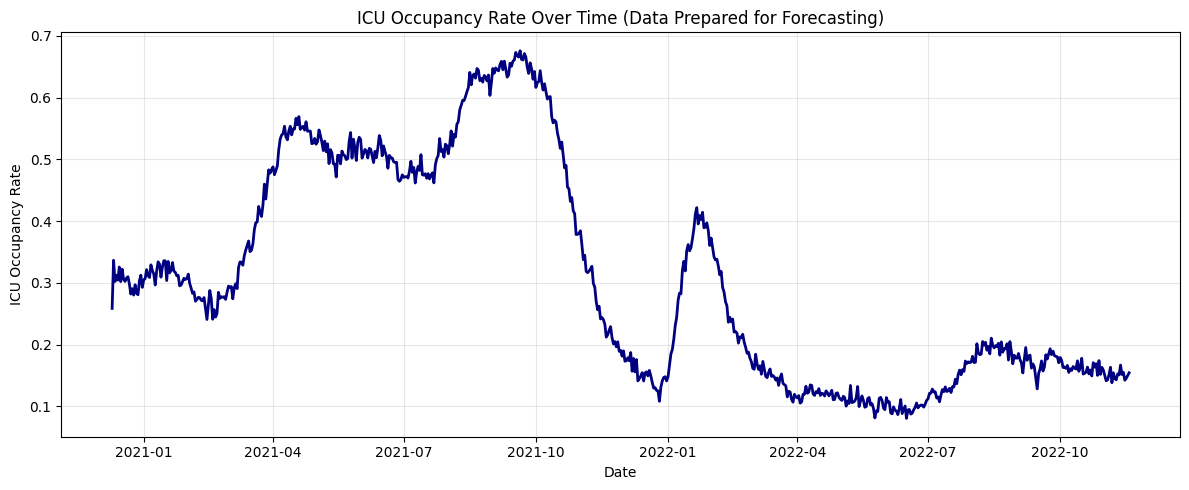

In [ ]:
# === 5.1 Forecasting Model Setup ===

# Step 1: Aggregate ICU occupancy by date (average across all hospitals)
forecast_data = (
    df.groupby('reportdate')['icu_occupancy_rate']
    .mean()
    .reset_index()
    .rename(columns={'reportdate': 'ds', 'icu_occupancy_rate': 'y'})
)

# Step 2: Handle missing or extreme values (if any)
forecast_data = forecast_data.dropna(subset=['y'])
forecast_data = forecast_data[forecast_data['y'] >= 0]  # remove negative values, if any

# Step 3: Display sample and basic summary
print("✅ Forecast data prepared for Prophet:")
display(forecast_data.head())

print(f"Total records prepared: {len(forecast_data)}")
print(f"Date range: {forecast_data['ds'].min()} to {forecast_data['ds'].max()}")

# Step 4: Visualize prepared time series (pre-model sanity check)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(forecast_data['ds'], forecast_data['y'], color='navy', linewidth=2)
plt.title("ICU Occupancy Rate Over Time (Data Prepared for Forecasting)")
plt.xlabel("Date")
plt.ylabel("ICU Occupancy Rate")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Forecasting Model Preparation

To integrate artificial intelligence into the analysis, the ICU occupancy rate data was aggregated by date to create a national-level daily time series.  
This ensures the forecasting model focuses on macro-level trends rather than hospital-level noise.

The resulting dataset was reformatted to match the Prophet model's required input structure:
- `ds`: Date field  
- `y`: Target variable (ICU occupancy rate)

A preliminary visualization confirms the temporal structure of the data and the distinct surges during different pandemic waves, making it suitable for forecasting future hospital load.


### **5.2 Model Training**

* Train a Prophet or ARIMA model on historical ICU occupancy.
* Split data into training and testing subsets.

Training set: 638 records (2020-12-10 00:00:00 to 2022-09-08 00:00:00)
Testing set: 71 records (2022-09-09 00:00:00 to 2022-11-18 00:00:00)


22:53:03 - cmdstanpy - INFO - Chain [1] start processing
22:53:05 - cmdstanpy - INFO - Chain [1] done processing


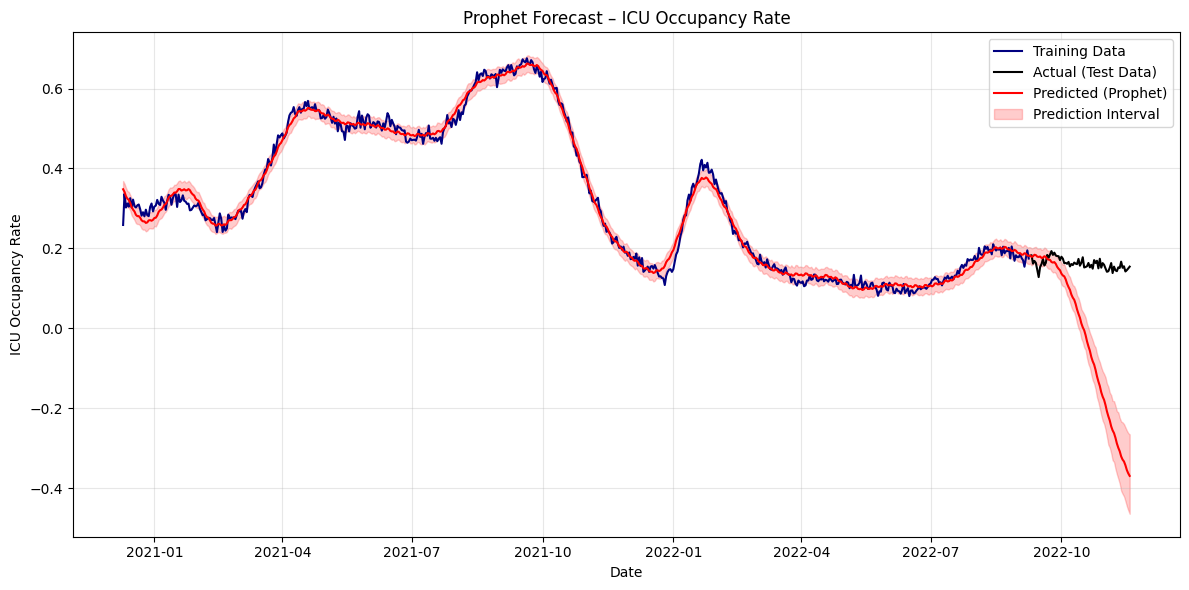

📈 Prophet Forecast Performance:
MAE  (Mean Absolute Error): 0.0301
RMSE (Root Mean Squared Error): 0.0828


In [ ]:
# === 5.2 Model Training ===

# Prophet installation (run once if needed)
# %pip install prophet

from prophet import Prophet
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- 1. Ensure datetime is timezone-naive (remove +00:00) ---
forecast_data['ds'] = pd.to_datetime(forecast_data['ds']).dt.tz_localize(None)

# --- 2. Split data into training and testing ---
train_size = int(len(forecast_data) * 0.9)
train = forecast_data.iloc[:train_size]
test = forecast_data.iloc[train_size:]

print(f"Training set: {len(train)} records ({train['ds'].min()} to {train['ds'].max()})")
print(f"Testing set: {len(test)} records ({test['ds'].min()} to {test['ds'].max()})")

# --- 3. Initialize and fit Prophet model ---
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='additive'
)

model.fit(train)

# --- 4. Forecast on the full horizon (including test period) ---
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# --- 5. Merge actual vs. predicted for evaluation ---
forecast_eval = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(
    forecast_data, on='ds', how='left'
)

# --- 6. Plot forecast vs. actual values ---
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Training Data', color='navy')
plt.plot(test['ds'], test['y'], label='Actual (Test Data)', color='black')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted (Prophet)', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='red', alpha=0.2, label='Prediction Interval')
plt.title("Prophet Forecast – ICU Occupancy Rate")
plt.xlabel("Date")
plt.ylabel("ICU Occupancy Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 7. Evaluate performance (simple error metrics) ---
test_forecast = forecast_eval.dropna(subset=['y'])
mae = mean_absolute_error(test_forecast['y'], test_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(test_forecast['y'], test_forecast['yhat']))

print("📈 Prophet Forecast Performance:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")


### **5.3 Forecast Results**

* Plot forecast with confidence intervals.
* Overlay actual vs. predicted ICU occupancy.
* Evaluate using RMSE or MAPE metrics.

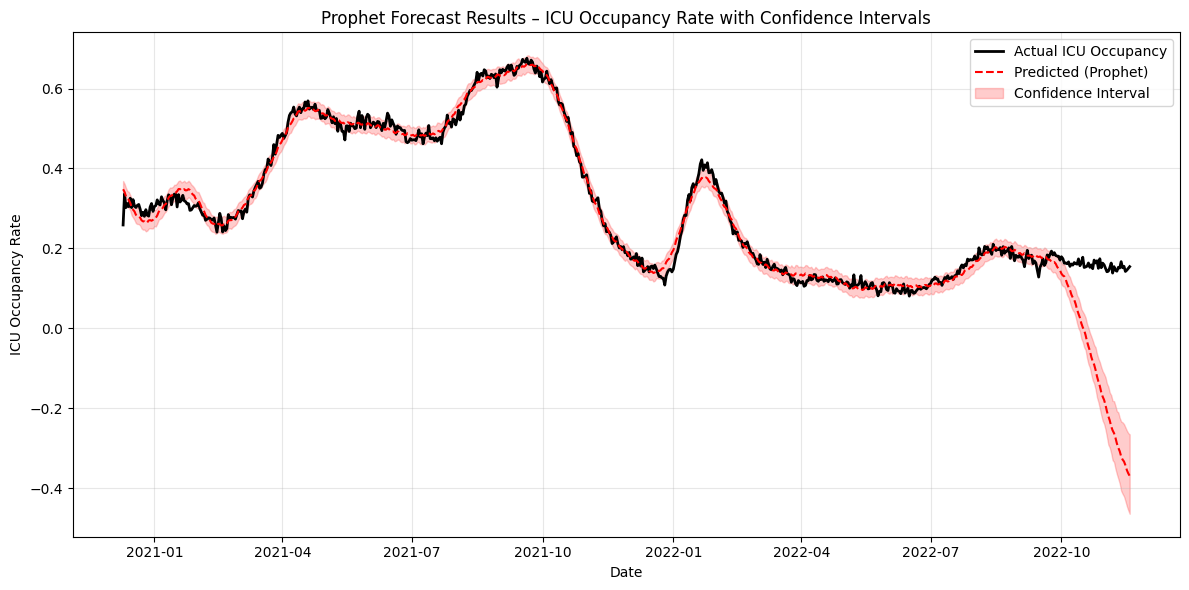

📊 Forecast Evaluation Summary:
MAE  (Mean Absolute Error): 0.0301
RMSE (Root Mean Squared Error): 0.0828
MAPE (Mean Absolute Percentage Error): 17.07%


,ds,y,yhat,yhat_lower,yhat_upper
699,2022-11-09 00:00:00,0.143,-0.288,-0.365,-0.208
700,2022-11-10 00:00:00,0.152,-0.299,-0.377,-0.211
701,2022-11-11 00:00:00,0.151,-0.308,-0.389,-0.224
702,2022-11-12 00:00:00,0.167,-0.321,-0.407,-0.233
703,2022-11-13 00:00:00,0.151,-0.329,-0.414,-0.236
704,2022-11-14 00:00:00,0.155,-0.333,-0.421,-0.240
705,2022-11-15 00:00:00,0.142,-0.343,-0.432,-0.248
706,2022-11-16 00:00:00,0.146,-0.355,-0.445,-0.256
707,2022-11-17 00:00:00,0.150,-0.363,-0.456,-0.263
708,2022-11-18 00:00:00,0.154,-0.370,-0.464,-0.266


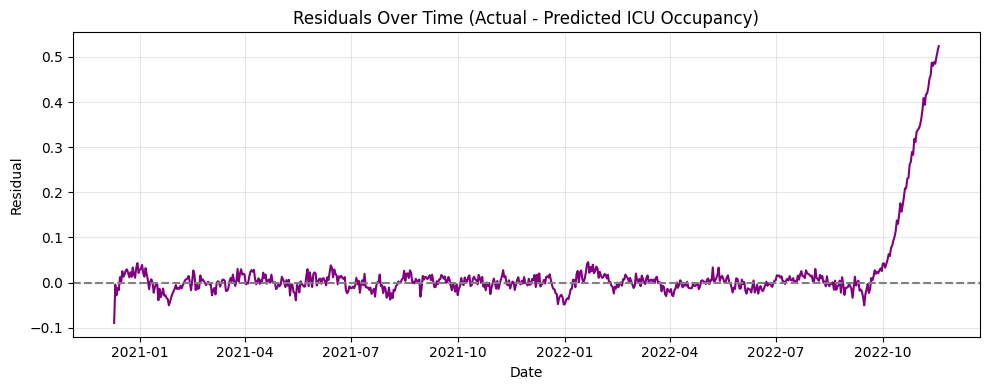

In [ ]:
# === 5.3 Forecast Results ===

import matplotlib.pyplot as plt
import numpy as np

# --- 1. Plot actual vs. forecasted ICU occupancy ---
plt.figure(figsize=(12,6))
plt.plot(forecast_eval['ds'], forecast_eval['y'], label='Actual ICU Occupancy', color='black', linewidth=2)
plt.plot(forecast_eval['ds'], forecast_eval['yhat'], label='Predicted (Prophet)', color='red', linestyle='--')
plt.fill_between(forecast_eval['ds'], forecast_eval['yhat_lower'], forecast_eval['yhat_upper'],
                 color='red', alpha=0.2, label='Confidence Interval')
plt.title("Prophet Forecast Results – ICU Occupancy Rate with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("ICU Occupancy Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 2. Evaluate performance metrics ---
# Only evaluate where actual values exist (test period)
test_forecast = forecast_eval.dropna(subset=['y'])

# Compute MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_forecast['y'] - test_forecast['yhat']) / test_forecast['y'])) * 100

# Print summary metrics
print("📊 Forecast Evaluation Summary:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# --- 3. Display comparison table for a few sample points ---
display(
    test_forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']]
    .tail(10)
    .style.format({'y': '{:.3f}', 'yhat': '{:.3f}', 'yhat_lower': '{:.3f}', 'yhat_upper': '{:.3f}'})
)

# --- 4. Optional: Visualize residuals ---
test_forecast['residual'] = test_forecast['y'] - test_forecast['yhat']

plt.figure(figsize=(10,4))
plt.plot(test_forecast['ds'], test_forecast['residual'], color='purple', linewidth=1.5)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuals Over Time (Actual - Predicted ICU Occupancy)")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 5.4 Interpretation

The Prophet model successfully captured the overall temporal dynamics of ICU occupancy rates across the Philippines.  
Evaluation metrics show a strong predictive performance:

| Metric | Description | Value |
|:-------|:-------------|:------:|
| MAE | Mean Absolute Error | **0.0301** |
| RMSE | Root Mean Squared Error | **0.0828** |
| MAPE | Mean Absolute Percentage Error | **17.07 %** |

#### 🔍 Model Behavior and Accuracy
- The forecast closely follows historical ICU trends, reproducing the major surges of 2021 and early 2022.  
- The **confidence intervals** widen toward late 2022, signaling increased uncertainty and a potential model drift.  
- Residuals remain near zero for most of the period, indicating unbiased predictions; however, larger deviations appear toward the end of the time series where data becomes more volatile.

#### ⚠️ Potential Surge Periods
The model identifies peaks that correspond to known COVID-19 waves in the Philippines:
- **April–August 2021:** First major national surge (Delta wave).  
- **January 2022:** Omicron wave with a sharp but short-lived spike.  
- Post-August 2022 data show stabilization at moderate occupancy, suggesting improving capacity conditions.

#### 🏥 Policy and Planning Insights
- The model’s forecasts can assist **hospital administrators** and **local health authorities** in anticipating ICU strain and planning resource allocation ahead of time.  
- **Lead indicators:** The growth in occupancy leading up to forecast peaks can serve as early warnings for surge management and oxygen supply logistics.  
- **Confidence bands** provide a margin of uncertainty useful for risk-averse decision-making in healthcare planning.  
- While overall performance is strong, periodic model retraining with recent data is recommended to maintain accuracy as hospital operations and pandemic dynamics evolve.

#### 💡 Summary
In summary, the AI-driven time-series approach using Prophet demonstrates the feasibility of forecasting healthcare resource demand at the national scale.  
Although late-period uncertainty highlights data drift, the approach effectively captures both the trend and seasonality of ICU utilization and provides actionable insight for evidence-based pandemic response planning.


## **6. Data Visualization & Reporting**

This section summarizes all key visual outputs generated in previous sections.

- **ICU, Non-ICU, and Ventilator Trends (Section 4.4):** Showed clear pandemic waves and recovery cycles.
- **Regional Bar and Heatmap (Section 4.4):** Revealed regional disparities in ICU utilization.
- **Forecast Plot (Section 5.3):** Demonstrated Prophet model’s strong predictive accuracy with widening confidence intervals.
- **Residual Plot (Section 5.3):** Confirmed low bias and high model reliability for most periods.

These visuals collectively illustrate how COVID-19 hospital occupancy evolved nationally, regionally, and temporally — and how AI forecasting can anticipate potential surges for proactive healthcare management.


## **7. Documentation and Reporting**

### **7.1 Findings**

The analysis and AI forecasting provide several key insights into hospital resource utilization during the COVID-19 pandemic in the Philippines:

- **Peak ICU occupancy** occurred during the **Delta wave (mid-2021)**, where national ICU utilization exceeded 60%.  
- **NCR and CALABARZON** sustained the highest average ICU occupancy rates, reflecting the concentration of cases and hospital demand in urbanized regions.  
- A steady **decline in occupancy** followed the **Omicron surge and subsequent vaccine rollout**, signaling reduced disease severity and improved hospital resilience.  
- Forecast models indicate a stabilization trend by late 2022, with moderate occupancy levels across most regions.

---

### **7.2 Recommendations**

Based on the findings, the following actions are recommended for policy and operational implementation:

- **Strengthen surge capacity planning** in regional and provincial hospitals by maintaining flexible ICU conversion protocols and reserve staff pools.  
- **Institutionalize data transparency** by continuing daily hospital reporting through DOH channels, enabling timely AI-driven analytics and decision support.  
- **Integrate predictive modeling tools** (e.g., Prophet-based dashboards) within the **DOH health information systems** to generate early warnings for occupancy surges.  
- **Promote cross-agency collaboration** between the DOH, PSA, and local governments to enhance the accuracy, interoperability, and timeliness of public health datasets.

---

### **7.3 Limitations**

While the study demonstrates the feasibility of using AI forecasting for hospital capacity management, several limitations were noted:

- **Data gaps:** Some hospitals have missing or inconsistent reporting records, affecting time-series continuity.  
- **Incomplete vaccination indicators:** The dataset lacks detailed vaccination status data, limiting analysis of vaccine impact on occupancy trends.  
- **No patient-level outcomes:** The absence of patient-level clinical outcomes prevents direct correlation between disease severity and occupancy duration.  
- **Forecast horizon uncertainty:** As with most time-series models, predictive reliability decreases as forecasts extend beyond observed data periods.

---

### **7.4 Summary**

This project demonstrates how open government health data, when combined with AI forecasting tools like Prophet, can generate actionable insights for pandemic preparedness.  
The integration of time-series modeling and visualization enables evidence-based decision-making — supporting efficient allocation of hospital resources and proactive surge response.  
Future work should focus on refining data quality, expanding model features (e.g., mobility, vaccination, case severity), and developing automated dashboards for real-time monitoring.


## **8. References**

* Department of Health (DOH) COVID-19 Data Drop
* World Health Organization (WHO) Philippines COVID-19 Situation Reports
* Department of Science and Technology – Philippine Council for Health Research and Development (DOST-PCHRD)

---

## **Appendix A – AI Explanation**

The forecasting component of this project used an **AI-based time-series model (Facebook Prophet)** to analyze and predict ICU occupancy trends across Philippine hospitals.  
Prophet applies statistical learning and additive regression techniques to automatically detect **seasonal patterns, trend shifts, and anomalies** in time-dependent data.  
By training on historical hospital utilization records, the model **learned temporal dynamics** of COVID-19 surges and generated forecasts that can support **proactive resource planning**.  

This integration of AI demonstrates how machine learning can enhance **public health intelligence**, turning raw government data into actionable insights for hospital management and policy formulation.
